# HIV Model
Austin Veseliza

In [4]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
import matplotlib.pyplot as plt


# import functions from the modsim.py module
from modsim import *

In [43]:
init_state = State(R=1000, L=0, E=0, V=100)

,values
R,1000
L,0
E,0
V,100


In [44]:
system = System(
    CD4_arise_rate  = 1.36, 
    CD4_active_prop = 0.2,
    CD4_death_rate    = 1.36 * 10**(-3),
    R_infect_rate   = 0.00027,
    
    latent_infect_prop = 0.1,
    L_activate_rate    = 3.6 * 10**(-2),
    E_death_rate       = 0.33,
    
    V_arise_rate = 100,
    V_death_rate = 2
)

,values
CD4_arise_rate,1.36000
CD4_active_prop,0.20000
CD4_death_rate,0.00136
R_infect_rate,0.00027
latent_infect_prop,0.10000
L_activate_rate,0.03600
E_death_rate,0.33000
V_arise_rate,100.00000
V_death_rate,2.00000


In [45]:
def R_in(system, state):
    return system.CD4_arise_rate * system.CD4_active_prop

def R_out(system, state):
    return (system.CD4_death_rate * state.R) + (system.R_infect_rate * state.R * state.V)

def R_delta(system, state):
    return R_in(system, state) - R_out(system, state)

In [46]:
def L_in(system, state):
    return system.latent_infect_prop * system.R_infect_rate * state.R * state.V

def L_out(system, state):
    return (system.CD4_death_rate * state.L) + (system.L_activate_rate * state.L)

def L_delta(system, state):
    return L_in(system, state) - L_out(system, state)

In [47]:
def E_in(system, state):
    return ((1 - system.latent_infect_prop) * system.R_infect_rate * state.R * state.V) + (system.L_activate_rate * state.L)

def E_out(system, state):
    return system.E_death_rate * state.E

def E_delta(system, state):
    return E_in(system, state) - E_out(system, state)

In [48]:
def V_in(system, state):
    return system.V_arise_rate * state.E

def V_out(system, state):
    return system.V_death_rate * state.V

def V_delta(system, state):
    return V_in(system, state) - V_out(system, state)

In [49]:
def step(system, state):
    r = state.R + R_delta(system, state) * 0.01
    l = state.L + L_delta(system, state) * 0.01
    e = state.E + E_delta(system, state) * 0.01
    v = state.V + V_delta(system, state) * 0.01
    
    return State(R=r, L=l, E=e, V=v)

In [50]:
def run_simulation(system, init_state, num_steps):
    
    results = TimeFrame(columns=init_state.index)
    
    results.row[0] = init_state
    
    for t in range(num_steps):
        results.row[t+1] = step(system, results.row[t])
    
    return results

In [51]:
results = run_simulation(system, init_state, 12000)

,R,L,E,V
0,1000,0,0,100
1,999.719,0.027,0.243,98
2,999.444,0.0534425,0.480281,96.283
3,999.173,0.0794045,0.712553,94.8376
4,998.906,0.10496,0.940495,93.6534
5,998.643,0.130179,1.16476,92.7208
6,998.382,0.155131,1.38597,92.0312
7,998.123,0.179882,1.60472,91.5765
8,997.865,0.204494,1.82161,91.3497
9,997.608,0.229029,2.03717,91.3443


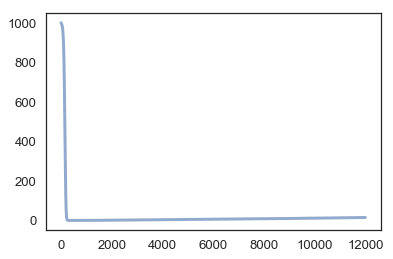

In [52]:
plot(results['R'])

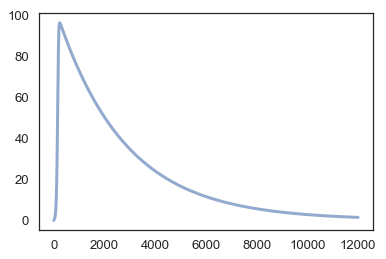

In [53]:
plot(results['L'])

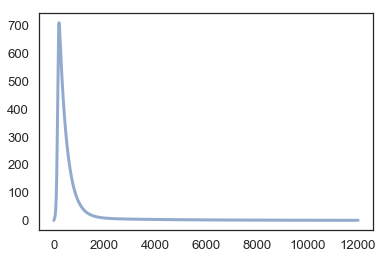

In [54]:
plot(results['E'])

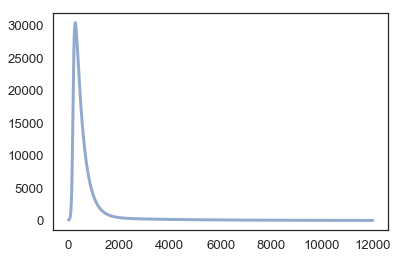

In [55]:
plot(results['V'])